# 기계학습 과제

### 응용통계학과
### 140104079
### 권태양

## HW1

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

%matplotlib inline 
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("SalaryData.csv")

In [22]:
lin_reg = LinearRegression()

lin_reg.fit(np.array(df["YearsExperience"]).reshape(-1,1), np.array(df["Salary"]))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
np.array(df["YearsExperience"]).reshape(-1,1)

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [25]:
def compute_cost(n,m, points):
    total_cost = 0
    N = float(len(points))      # 왜 float로 casting 했는지 ? 
    
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        total_cost += (y-(m*x+n))**2
        
    return total_cost/N    # 때에 따라 N은 없어도 됨.

In [26]:
def gradient_descent_runner(points, starting_m, starting_n, learning_rate, num_iterations):
    
    m = starting_m
    n = starting_n
    
    cost_graph = []
    
    for i in range(num_iterations):
        cost_graph.append(compute_cost(n,m,points))
        m,n = step_gradient(m,n, points, learning_rate)
        
    return [m,n,cost_graph]


def step_gradient(m_current, n_current, points, learning_rate):
    m_gradient = 0 
    n_gradient = 0 
    N = float(len(points))
    
    for i in range(len(points)):
        x = points[i,0]
        y = points[i,1]
        m_gradient += -(2/N)*x*(y-(m_current*x + n_current))
        n_gradient += -(2/N)*(y-(m_current*x + n_current))
        
    m_updated = m_current - learning_rate * m_gradient 
    n_updated = n_current - learning_rate * n_gradient 
        
    return m_updated, n_updated

In [27]:
learning_rate = 0.01     # hyper parameter: alpha
num_iterations = 1000     # hyper parameter: number of steps 
initial_m = 10      # initial guess for m 
initial_n = 4000      # initial guess for n 

In [28]:
x = np.array(points[:,0])
y = np.array(points[:,1])

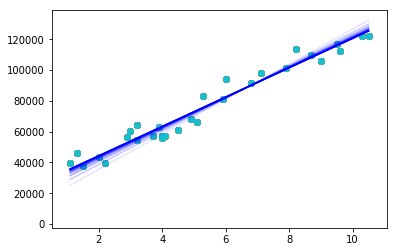

In [32]:
points = np.array(df)
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

for i in range(0,1000,100):
    m, n , cost_graph = gradient_descent_runner(points, initial_m, initial_n, learning_rate, i) # 100부터 100단위로 m,n 값 확인
    pred = m*x + n 
    plt.scatter(x,y) # 산점도
    plt.plot(x,pred,c = 'B',alpha = i/900) # 투명도를 점점 진하게

## HW2

In [30]:
from numpy.linalg import inv

In [31]:
x = x.reshape(-1,1)
Y = y.reshape(-1,1)
x_0 = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1]) 
x_0 = x_0.reshape(-1,1)
x_0.shape
X = np.hstack((x_0,x)) # 하나의 열이 1인 벡터와 x벡터 결합
X

X_transe = np.transpose(X)
np.dot(inv(np.dot(X_transe,X)),np.dot(X_transe,Y)) # Theta 구하는 식

array([[25792.20019867],
       [ 9449.96232146]])